# Сборный проект "Компьютерные игры"

## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Шаг 1. 
- Откройте файл с данными и изучите общую информацию

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

Изучил общую информацию о датасете. 16715 строк, 11 столбцов. В оценках пользователей и критиков, а тажкже рейтинге игор большое количество пропусков.

### Шаг 2. Подготовьте данные
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
    - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишите причины, которые могли привести к пропускам;
    - Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [5]:
# Замените названия столбцов (приведите к нижнему регистру);
df.columns = df.columns.str.lower()

In [6]:
# Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
df['year_of_release'] = df['year_of_release'].fillna(0)
df['year_of_release'] = df['year_of_release'].astype(int)

In [7]:
df['total_sales'] = (
    df['na_sales']
    + df['eu_sales']
    + df['jp_sales']
    + df['other_sales']
)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### Вывод

Привел к нижнему регистру заголовки таблицы, в столбце с датой релиза отсутствующие значения заменил на 0 и привел к виду года. Значение TBD, которое есть в столбце с оценкой пользователей значит "не определен". Не стал его заменить, так как его нельзя заменить средними и в целом, это значение не будет мешать при дальнейшем анализе. Сделал столбец с общими продажами игр по миру.

### Шаг 3. Проведите исследовательский анализ данных
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

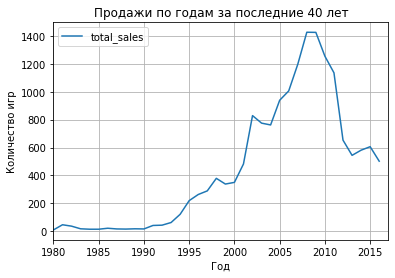

In [8]:
# Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
df_years = df.pivot_table(index='year_of_release', values='total_sales', aggfunc='count')

# За все периоды - не важны. Изменились технологии, сами игры. Возможно, надо взять игры послдение 5 - 10 лет.
df_years = df_years.reset_index()
df_years.plot(x = "year_of_release", xlim=(1980, 2017), grid=True);
plt.xlabel("Год");
plt.ylabel("Количество игр");
plt.title("Продажи по годам за последние 40 лет");

In [9]:
# Посмотрите, как менялись продажи по платформам.
# Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 
# За какой характерный срок появляются новые и исчезают старые платформы?

# Смотрим платформы по наибольшим продажам
total_sales = df.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').reset_index()
total_sales

,platform,year_of_release,total_sales
0,2600,0,10.50
1,2600,1980,11.38
2,2600,1981,35.68
3,2600,1982,28.88
4,2600,1983,5.84
...,...,...,...
249,XB,2008,0.18
250,XOne,2013,18.96
251,XOne,2014,54.07
252,XOne,2015,60.14


In [10]:
# Делаем список из топ-10 платформ по продажам
platform = total_sales.groupby('platform')['total_sales'].agg('sum').sort_values(ascending
                                                                                 =False).head(10).index.to_list()
platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

In [11]:
# Срез по топ-10 платформам и играм от 2010 года
platform_top_10 = df.query('platform == @platform and year_of_release >= 2010').pivot_table(
    index=['platform', 'year_of_release'],
    values='total_sales',
    aggfunc='sum'
).reset_index()

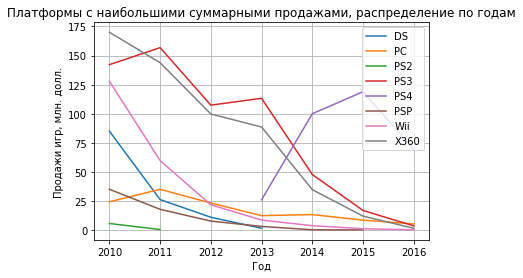

In [12]:
# График по продажаем за последние 6 лет по топ-10 платформам
for platform in platform_top_10['platform'].unique():
    x = platform_top_10.query('platform == @platform')['year_of_release']
    y = platform_top_10.query('platform == @platform')['total_sales']
    plt.plot(x, y, label = platform)
    plt.legend(loc = 'upper right')
    plt.grid(True)
    plt.rcParams['figure.figsize'] = [10, 9]
    plt.xlabel("Год");
    plt.ylabel("Продажи игр, млн. долл.");
    plt.title("Платформы с наибольшими суммарными продажами, распределение по годам");
plt.show()

In [13]:
# За какой характерный срок появляются новые и исчезают старые платформы?
df_life = df.query('year_of_release not in "0"')
df_mean_life = (
    df_life.groupby('platform')['year_of_release'].max() - df_life.groupby('platform')['year_of_release'].min()
).mean()
print('Средняя продолжительность жизни платформы', int(df_mean_life), 'лет.')

### вообще я хотел посчитать по-другому: посчитать среднее количество лет до того момента, 
### когда продажи по каждой платформе макисмальны, 
### и дальше также от максимума до минимума, но не знаю как это сделать

Средняя продолжительность жизни платформы 7 лет.


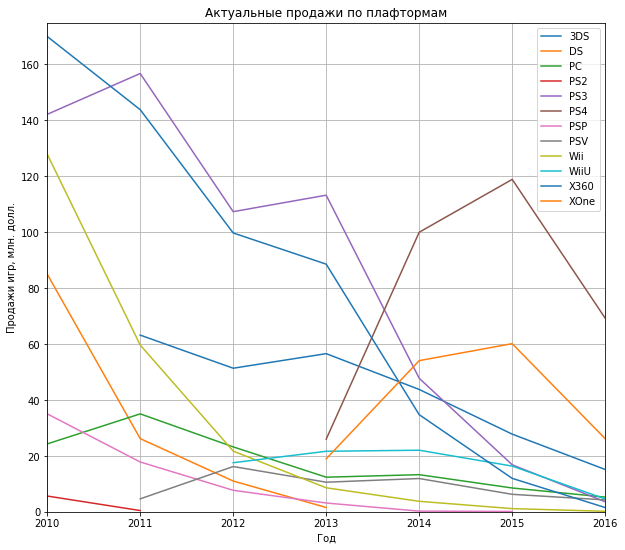

In [14]:
# Возьмите данные за соответствующий актуальный период. 
# Актуальный период определите самостоятельно в результате исследования предыдущих вопросов.
# Основной фактор — эти данные помогут построить прогноз на 2017 год.
# Не учитывайте в работе данные за предыдущие годы.
# Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
most = df.query('year_of_release >= 2010')['platform'].unique()
for most in total_sales.query('year_of_release >= 2010')['platform'].unique():
    x = total_sales.query('platform == @most and year_of_release >= 2010')['year_of_release']
    y = total_sales.query('platform == @most and year_of_release >= 2010')['total_sales']
    plt.plot(x, y, label = most)
    plt.legend(loc = 'best')
    plt.grid(True)
    plt.xlabel("Год");
    plt.ylabel("Продажи игр, млн. долл.");
    plt.title("Актуальные продажи по плафтормам");
    plt.xlim(2010, 2016)
    plt.ylim(0, 175)
    plt.rcParams['figure.figsize'] = [10, 7]
plt.show()
# потенциально прибыльные плафтормы - PS4, XOne, 3DS, PC
# падают весь рынок за послдение 6 лет, однако плафторма PS4 до 2015 года показывала рост, после - тоже спад.

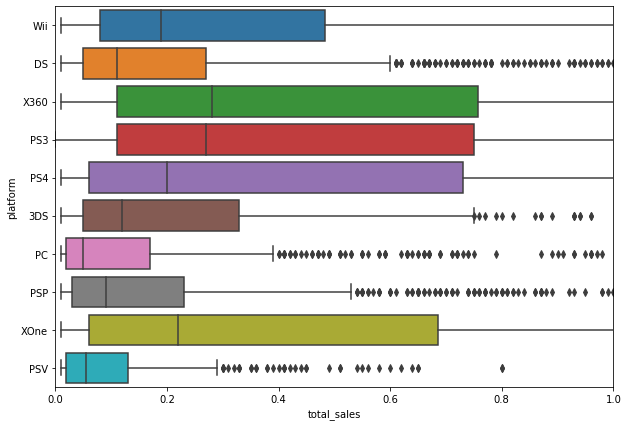

In [15]:
# Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. 
# Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.
top_platforms = df.query('year_of_release >= 2010')['platform'].value_counts(
).sort_values(ascending=False).head(10).index.values
sns.boxplot(y="platform", x="total_sales", data=df[df['platform'].isin(top_platforms)], orient="h");
plt.xlim(0, 1);

,user_score,critic_score,total_sales
user_score,1.000000,0.629005,0.126691
critic_score,0.629005,1.000000,0.428033
total_sales,0.126691,0.428033,1.000000


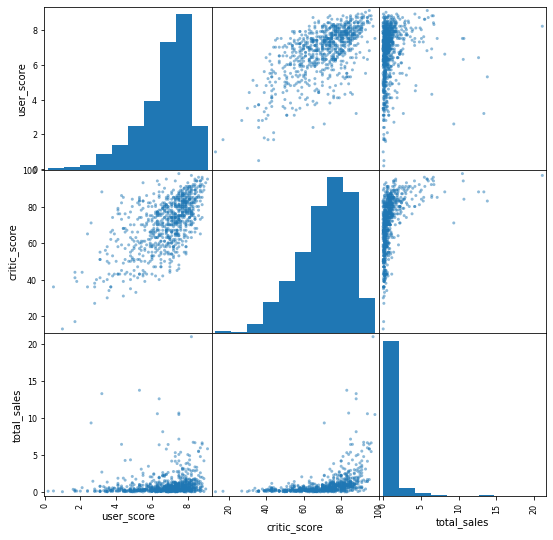

In [16]:
# Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
# Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

df_corr = df[{'platform', 'critic_score', 'user_score', 'total_sales'}]
df_corr = df_corr.query('platform == "PS3" and user_score not in "tbd"')
df_corr['user_score'] = df_corr['user_score'].astype(float)
pd.plotting.scatter_matrix(df_corr, figsize=(9, 9));
df_corr.corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.580878,0.088179
critic_score,0.580878,1.000000,0.237351
total_sales,0.088179,0.237351,1.000000


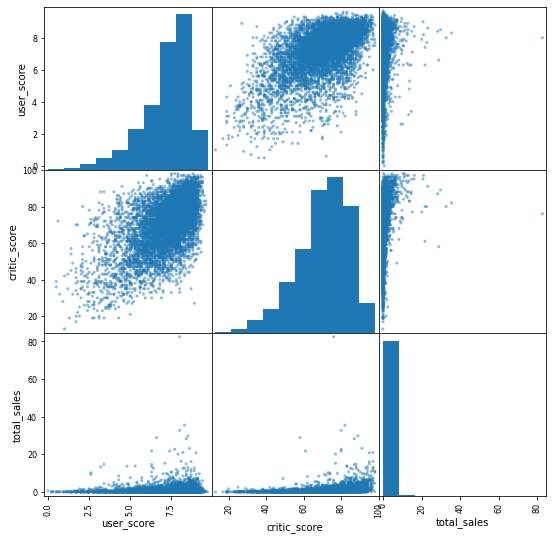

In [17]:
# Соотнесите выводы с продажами игр на других платформах.
df_corr = df[{'platform', 'critic_score', 'user_score', 'total_sales'}]
df_corr = df_corr.query('user_score not in "tbd"')
df_corr['user_score'] = df_corr['user_score'].astype(float)
pd.plotting.scatter_matrix(df_corr, figsize=(9, 9));
df_corr.corr()

In [18]:
# Посмотрите на общее распределение игр по жанрам. 
# Что можно сказать о самых прибыльных жанрах? 
# Выделяются ли жанры с высокими и низкими продажами?
df_genre = df.pivot_table(
    index='genre', 
    values='total_sales', 
    aggfunc=['count', 'sum']
)
df_genre.columns = ['count_total_sales', 'sum_total_sales']
df_genre.reset_index()
df_genre['ratio_count'] = (df_genre['count_total_sales'] / df_genre['count_total_sales'].sum())*100
df_genre['ratio_sum'] = (df_genre['sum_total_sales'] / df_genre['sum_total_sales'].sum())*100
df_genre.sort_values(by='ratio_sum', ascending=False)

,count_total_sales,sum_total_sales,ratio_count,ratio_sum
genre,,,,
Action,3369,1744.17,20.157961,19.568195
Sports,2348,1331.27,14.048944,14.935787
Shooter,1323,1052.45,7.915994,11.807649
Role-Playing,1498,934.56,8.963083,10.485017
Platform,888,827.77,5.313229,9.286919
Misc,1750,802.51,10.470891,9.003522
Racing,1249,728.67,7.473224,8.175096
Fighting,849,447.53,5.079878,5.020929
Simulation,873,389.97,5.223479,4.375152


### Вывод


Рассмотрел продажи игр за последние 40 лет. Максимальное количество проданных игр в штуках (около 1400) - 2007, 2008 года. До этих дат был рост, после спад продаж.

Затем выбрал платформы с наибольшими суммарными продажами за последние 6 лет. Рост по продажам был у PS4 до 2015 года. После как у всех остальных - спад.

Посчитал среднюю продолжительность жизни платформы - 7 лет.

Дальше рассмотрел продажи за последние 6 лет. Потенциально прибыльные плафтормы - PS4, XOne, 3DS, PC. Падает весь рынок за послдение 6 лет, однако плафтормы PS4 и Xone до 2015 года показывала рост, после - тоже спад.

Дальше с помощью boxplot'а рассмотрел продажи игр в разрезе платформ. 50% продаж у платформ PS3 и X360 сосредоточена в диапозоне от 100 тысяч до 700 тысяч.Средние продажи у конкурентов (PS3 и X360) примерно равны, но у X360 больше. Такая же ситуация у PS4 и XOne.

Далее рассмотрел корреляцию между общими продажами и оценками критиков/пользователей на примере платформы PS3. На продажи практически не влияет оценка пользователей, оценка критиков - сильнее и составляет 0.42. 

Рассмотрел также кореляцию по всем данным. Влияние оценок критиков и пользователей практически не влияет на продажи.

### Шаг 4. Составьте портрет пользователя каждого региона
- Определите для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясните разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [19]:
df_na = df.pivot_table(
    index='platform',
    values='na_sales',
    aggfunc='sum'
).sort_values(by='na_sales', ascending=False)
df_na['%_na_sales'] = (df_na['na_sales'] / df_na['na_sales'].sum())*100
df_na.head(5)

,na_sales,%_na_sales
platform,,
X360,602.47,13.685191
PS2,583.84,13.262008
Wii,496.90,11.287153
PS3,393.49,8.938181
DS,382.40,8.686270


In [20]:
df_eu = df.pivot_table(
    index='platform',
    values='eu_sales',
    aggfunc='sum'
).sort_values(by='eu_sales', ascending=False)
df_eu['%_eu_sales'] = (df_eu['eu_sales'] / df_eu['eu_sales'].sum())*100
df_eu.head(5)

,eu_sales,%_eu_sales
platform,,
PS2,339.29,13.993244
PS3,330.29,13.622060
X360,270.76,11.166880
Wii,262.21,10.814255
PS,213.61,8.809859


In [21]:
df_jp = df.pivot_table(
    index='platform',
    values='jp_sales',
    aggfunc='sum'
).sort_values(by='jp_sales', ascending=False)
df_jp['%_jp_sales'] = (df_jp['jp_sales'] / df_jp['jp_sales'].sum())*100
df_jp.head(5)

,jp_sales,%_jp_sales
platform,,
DS,175.57,13.532762
PS,139.82,10.777188
PS2,139.20,10.729399
SNES,116.55,8.983559
3DS,100.67,7.759544


In [22]:
df_genres_na = df.pivot_table(
    index='genre',
    values='na_sales',
    aggfunc='sum'
).sort_values(by='na_sales', ascending=False)
df_genres_na.head(5)

,na_sales
genre,
Action,879.01
Sports,684.43
Shooter,592.24
Platform,445.50
Misc,407.27


In [23]:
df_genres_eu = df.pivot_table(
    index='genre',
    values='eu_sales',
    aggfunc='sum'
).sort_values(by='eu_sales', ascending=False)
df_genres_eu.head(5)

,eu_sales
genre,
Action,519.13
Sports,376.79
Shooter,317.34
Racing,236.51
Misc,212.74


In [24]:
df_genres_jp = df.pivot_table(
    index='genre',
    values='jp_sales',
    aggfunc='sum'
).sort_values(by='jp_sales', ascending=False)
df_genres_jp.head(5)

,jp_sales
genre,
Role-Playing,355.41
Action,161.43
Sports,135.54
Platform,130.83
Misc,108.11


In [25]:
# Заменим текстовые рейтинги числами, чтобы посмотреть зависимость
df.loc[df['rating'] == "AO", 'rating'] = 8
df.loc[df['rating'] == "E", 'rating'] = 7
df.loc[df['rating'] == "M", 'rating'] = 6
df.loc[df['rating'] == "T", 'rating'] = 5
df.loc[df['rating'] == "E10+", 'rating'] = 4
df.loc[df['rating'] == "K-A", 'rating'] = 3
df.loc[df['rating'] == "EC", 'rating'] = 2
df.loc[df['rating'] == "RP", 'rating'] = 1

,jp_sales,rating,eu_sales,na_sales,total_sales
jp_sales,1.000000,0.017602,0.435061,0.449594,0.612289
rating,0.017602,1.000000,0.037691,0.044509,0.040530
eu_sales,0.435061,0.037691,1.000000,0.765335,0.901240
na_sales,0.449594,0.044509,0.765335,1.000000,0.941017
total_sales,0.612289,0.040530,0.901240,0.941017,1.000000


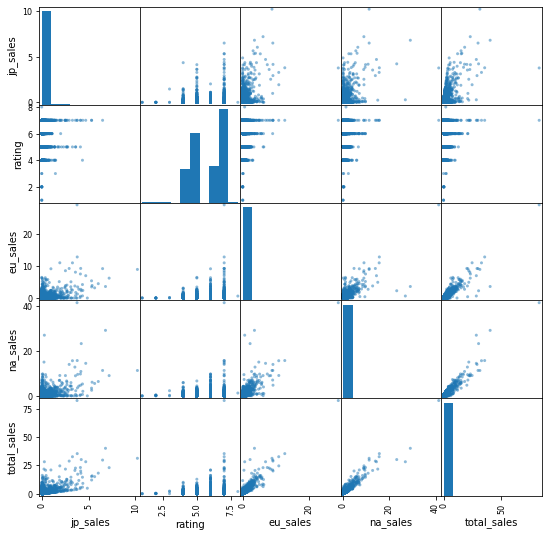

In [26]:
# смотрим корреляцию и строим график
df.rating.dropna().unique().astype(int)
df_rating = df[{'na_sales', 'eu_sales', 'jp_sales', 'total_sales', 'rating'}]
df_rating = df_rating.copy()
df_rating['rating'] = df_rating['rating'].astype(float)
pd.plotting.scatter_matrix(df_rating, figsize=(9, 9));
df_rating.corr()

### Вывод

Рассмотрел продажи платформ по регионам. В Северной Америке и Европе в топ-5 находятся практически одни и те же платформы, в Японии же топ-5 плафторм - японские платформы PS, DS. В Японии сильно развиты свои же платформы.

Ситуация с жанрами аналогичная: в Северной Америке и Европе в топе практически одни и те же жарны (Action, Sports, , Shooter), в Японии с отрывром Role-Playing.

Корреляция между возрастным рейтингом - и продажами остутствует.

### Шаг 5. Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.
Задайте самостоятельно пороговое значение alpha.

Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

#### Проверка гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"
H_0 - Средний пользовательский рейтинг платформы Xbox One = Средний пользовательский рейтинг платформы PC

H_1 - Средний пользовательский рейтинг платформы Xbox One != Средний пользовательский рейтинг платформы PC

In [27]:
df_stat = df.query('platform == "PC" or platform == "XOne"')
df_stat = df_stat.query('user_score not in "tbd"')
#df_stat = df_stat.dropna()
df_stat['user_score'] = df_stat['user_score'].astype(float)
df_stat_pc = df_stat.query('platform == "PC"')
df_stat_xone = df_stat.query('platform == "XOne"')

alpha = 0.05
results = st.ttest_ind(df_stat_pc['user_score'], df_stat_xone['user_score'], equal_var = False, nan_policy="omit")
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print('Pvalue -', results.pvalue)

Отвергаем нулевую гипотезу
Pvalue - 4.9350723601835005e-06


Н_0 - отвергнута

#### Проверка гипотезы "Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные"
H_0 - Средний пользовательский рейтинг жанров Action  = Средний пользовательский рейтинг жанров Sports

H_1 - Средний пользовательский рейтинг жанров Action != Средний пользовательский рейтинг жанров Sports

In [28]:
df_stat_genre = df.query('genre == "Action" or genre == "Sports"')
df_stat_genre = df_stat_genre.query('user_score not in "tbd"')
#df_stat_genre = df_stat_genre.dropna()
df_stat_genre['user_score'] = df_stat_genre['user_score'].astype(float)
df_stat_genre_act = df_stat_genre.query('genre == "Action"')
df_stat_genre_sports = df_stat_genre.query('genre == "Sports"')
alpha = 0.05
results = st.ttest_ind(df_stat_genre_act['user_score'], 
                       df_stat_genre_sports['user_score'], 
                       equal_var = False, 
                       nan_policy="omit")
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print('Pvalue -', results.pvalue)
print('Средний пользовательский рейтинг жанров Action - ', df_stat_genre_act['user_score'].mean())
print('Средний пользовательский рейтинг жанров Sports - ', df_stat_genre_sports['user_score'].mean())

Не получилось отвергнуть нулевую гипотезу
Pvalue - 0.11483818791510716
Средний пользовательский рейтинг жанров Action -  7.054043715846995
Средний пользовательский рейтинг жанров Sports -  6.96119673617407


Не смог отвергнуть нулевую гипотезу. Аргументов недостаточно, чтобы отвергнуть нулевую гипотезу. Результаты не значимы на 5% уровне.

### Шаг 6. Напишите общий вывод

### Общий вывод

Рассмотрел датасет, в котором 16715 строк и 11 столбцов.

Значение TBD, которое есть в столбце с оценкой пользователей значит "не определен". Сделал столбец с общими продажами игр по миру.

Рассмотрел продажи игр за последние 40 лет. Максимальное количество проданных игр в штуках (около 1400) - 2007, 2008 года. До этих дат был рост, после спад продаж.
Затем выбрал платформы с наибольшими суммарными продажами за последние 6 лет. Рост по продажам был у PS4 до 2015 года. После как у всех остальных - спад.
Посчитал среднюю продолжительность жизни платформы - 7 лет.
Дальше рассмотрел продажи за последние 6 лет. Потенциально прибыльные плафтормы - PS4, XOne, 3DS, PC. Падает весь рынок за послдение 6 лет, однако плафтормы PS4 и Xone до 2015 года показывала рост, после - тоже спад.
50% продаж у платформ PS3 и X360 сосредоточена в диапозоне от 100 тысяч до 700 тысяч. Средние продажи у конкурентов (PS3 и X360) примерно равны, но у X360 больше. Такая же ситуация у PS4 и XOne.
Далее рассмотрел корреляцию между общими продажами и оценками критиков/пользователей на примере платформы PS3. На продажи практически не влияет оценка пользователей, оценка критиков - сильнее и составляет 0.42. 
Рассмотрел также кореляцию по всем данным. Оценки критиков и пользователей практически не влияют на продажи.

В Северной Америке и Европе в топ-5 находятся практически одни и те же платформы, в Японии же топ-5 плафторм - японские платформы PS, DS. В Японии сильно развиты свои же платформы.
Ситуация с жанрами аналогичная: в Северной Америке и Европе в топе практически одни и те же жарны (Action, Sports, , Shooter), в Японии с отрывром Role-Playing.
Корреляция между возрастным рейтингом - и продажами остутствует.

Провел статические тесты, в котором отверг гипотезу о равенстве средних оценок пользователей плафторм Xbox One и PC. 
Гипотезу о равенстве среднего пользовательского рейтинга жанров Action и Sports отвергнуть не получилсоь. Средний пользовательский рейтинг жанров Action -  7.05, средний пользовательский рейтинг жанров Sports -  6.96.